
## 实战项目：图像标注

---

Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，你将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# 为实例的注释初始化 COCO API
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)#图片信息集合coco

# 为标题注释初始化COCO API
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)#标记信息的集合coco_caps

# get image ids 
ids = list(coco.anns.keys())#图片的标注索引集合ids
print(len(ids))

loading annotations into memory...
Done (t=6.28s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
291875


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

1183790
{'segmentation': [[599.94, 301.31, 603.38, 299.85, 607.59, 298.9, 610.95, 300.45, 611.72, 304.58, 613.61, 308.79, 613.96, 310.17, 613.36, 311.29, 611.46, 312.32, 599.6, 313.87, 598.39, 309.91, 597.02, 305.7, 596.93, 303.2, 598.48, 301.48]], 'area': 187.82960000000057, 'iscrowd': 0, 'image_id': 247576, 'bbox': [596.93, 298.9, 17.03, 14.97], 'category_id': 33, 'id': 1183790}
http://images.cocodataset.org/val2014/COCO_val2014_000000247576.jpg
COCO_val2014_000000247576.jpg
/opt/cocoapi/images/train2014/
/opt/cocoapi/images/train2014/COCO_train2014_000000000009.jpg


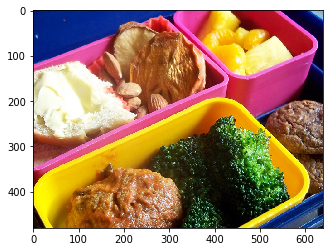

A red double decker bus driving down the street
A large red double decker bus traveling down a street surrounded by tall buildings.
A double decker bus driving down the street
Double decker bus moving through the center of an old downtown area. 
A busy city street with a double Decker bus. 


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline
ann_id = np.random.choice(ids)
print(ann_id)
img_id = coco.anns[ann_id]['image_id']
print(coco.anns[ann_id])#里面保存着'segmentation',图片的id'image_id',可以通过此id通过coco.loadImgs(img_id)方法,得到图片相关信息,
#通过coco_caps.getAnnIds(imgIds=img['id'])得到标注的id,coco_caps.loadAnns(annIds)可以得到标注
#分类id('category_id'),coco id
img = coco.loadImgs(img_id)[0]#保存着图片的信息,比如:文件名(file_name),图片url(coco_url),宽,高,图片的id
# print(coco.loadImgs(img_id))#没有意义,是个装有字典的列表
path = coco.loadImgs(img_id)[0]['file_name']
#分两个表  coco(coco.anns.keys,coco.anns[ann_id]图片id ('image_id'))    coco_cap   
# print URL and visualize corresponding image

# load and display captions
url = img['coco_url']
print(url)
print(path)
cocoapi_loc='/opt'
img_folder = os.path.join(cocoapi_loc, 'cocoapi/images/train2014/')
print(img_folder)
path=os.path.join(img_folder, "COCO_train2014_000000000009.jpg")
print(path)
image=cv2.imread(path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: 接下来的任务！

在这个项目中，你要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook  (**1_Preliminaries-zh.ipynb**) 中，你将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](images/encoder-decoder.png)